<a href="https://colab.research.google.com/github/swilsonmfc/timeseries/blob/master/Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Pandas Support

# Install


# Setup

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data

In [8]:
temp_df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv',
                         infer_datetime_format=True,
                         parse_dates=True,
                         index_col='Date')
temp_df.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


Text(0.5, 1.0, 'Sydney Temperature Activity')

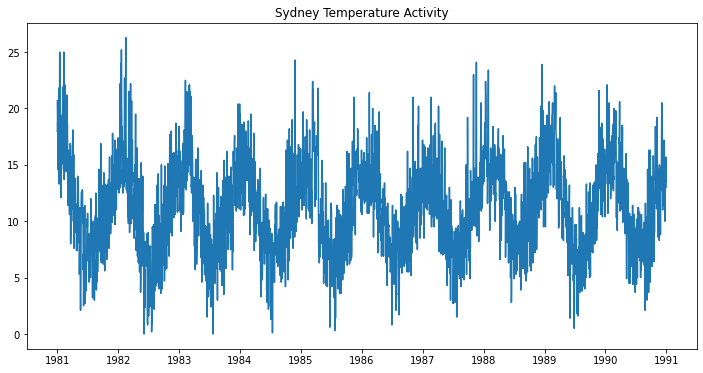

In [9]:
plt.figure(figsize=(12,6))
plt.plot(temp_df)
plt.title('Sydney Temperature Activity')


# DateTimeIndex
* Specialized Index for Pandas DataFrames
* Support time series functions
* Support for date slicing

In [10]:
temp_df.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


In [11]:
temp_df.index

DatetimeIndex(['1981-01-01', '1981-01-02', '1981-01-03', '1981-01-04',
               '1981-01-05', '1981-01-06', '1981-01-07', '1981-01-08',
               '1981-01-09', '1981-01-10',
               ...
               '1990-12-22', '1990-12-23', '1990-12-24', '1990-12-25',
               '1990-12-26', '1990-12-27', '1990-12-28', '1990-12-29',
               '1990-12-30', '1990-12-31'],
              dtype='datetime64[ns]', name='Date', length=3650, freq=None)

# Missing Values

In [12]:
temp_df.Temp.isna()

Date
1981-01-01    False
1981-01-02    False
1981-01-03    False
1981-01-04    False
1981-01-05    False
              ...  
1990-12-27    False
1990-12-28    False
1990-12-29    False
1990-12-30    False
1990-12-31    False
Name: Temp, Length: 3650, dtype: bool

In [14]:
temp_df.Temp.isna().sum()

0

# Frequency
* Frequency refers to the periodicity of the data
* Can't set a frequency on data missing in the index (a day or month not there)
* Can handle NaN values for a given measurement
* Here we don't have 1984-12-31
* But with a frequency, we gained the missing rows

In [30]:
temp_df['1984-12-30':'1985-01-02']

,Temp
Date,
1984-12-30,16.4
1985-01-01,13.3
1985-01-02,15.2


In [31]:
temp_df = temp_df.asfreq('D')

In [32]:
temp_df.index

DatetimeIndex(['1981-01-01', '1981-01-02', '1981-01-03', '1981-01-04',
               '1981-01-05', '1981-01-06', '1981-01-07', '1981-01-08',
               '1981-01-09', '1981-01-10',
               ...
               '1990-12-22', '1990-12-23', '1990-12-24', '1990-12-25',
               '1990-12-26', '1990-12-27', '1990-12-28', '1990-12-29',
               '1990-12-30', '1990-12-31'],
              dtype='datetime64[ns]', name='Date', length=3652, freq='D')

In [33]:
temp_df['1984-12-30':'1985-01-02']

,Temp
Date,
1984-12-30,16.4
1984-12-31,NaN
1985-01-01,13.3
1985-01-02,15.2


# Impute
* Traditional impute strategy like mean or median
* Backfill (take future value and back fill it over the missing value)
* Forward fill (take next value)
* Be careful of leaking if back

In [34]:
temp_df = temp_df.fillna(method='bfill')

In [35]:
temp_df['1984-12-30':'1985-01-02']

,Temp
Date,
1984-12-30,16.4
1984-12-31,13.3
1985-01-01,13.3
1985-01-02,15.2


# Slicing

Text(0.5, 1.0, 'Sydney Temperature Activity - 1981')

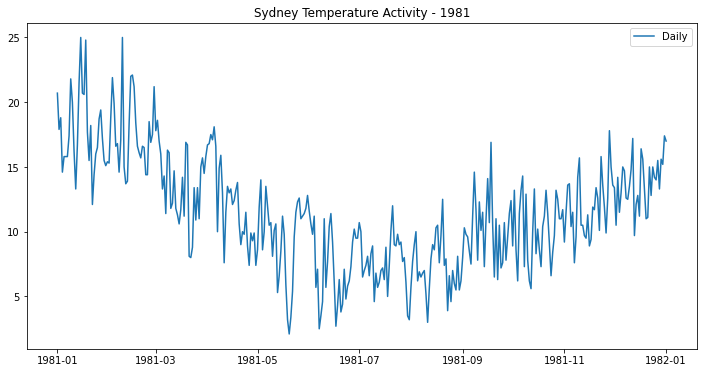

In [36]:
plt.figure(figsize=(12,6))
plt.plot(temp_df['1981-01-01':'1982-01-01'], label='Daily')
plt.legend()
plt.title('Sydney Temperature Activity - 1981')

# Shift

In [27]:
shift_df = temp_df.copy()
shift_df['Last'] = shift_df.shift(1)
shift_df['Diff'] = shift_df.Last - shift_df.Temp
shift_df.head()

,Temp,Last,Diff
Date,,,
1981-01-01,20.7,NaN,NaN
1981-01-02,17.9,20.7,2.8
1981-01-03,18.8,17.9,-0.9
1981-01-04,14.6,18.8,4.2
1981-01-05,15.8,14.6,-1.2


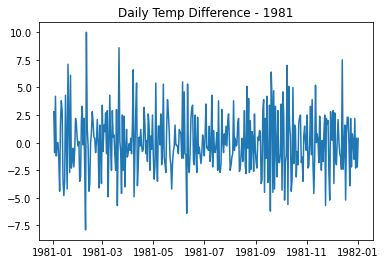

In [28]:
plt.plot(shift_df.Diff['1981-01-01':'1982-01-01'])
plt.title('Daily Temp Difference - 1981');

# Resample
* Similar to group by but very time series friendly
* Set the rule for the grouping
* Apply an aggregate function to set the value for the grouping

In [24]:
avg_temp_df = temp_df.resample(rule='30D').mean()
avg_temp_df.head()

,Temp
Date,
1981-01-01,17.790000
1981-01-31,17.606667
1981-03-02,13.356667
1981-04-01,12.356667
1981-05-01,9.380000


Text(0.5, 1.0, 'Sydney Temperature Activity')

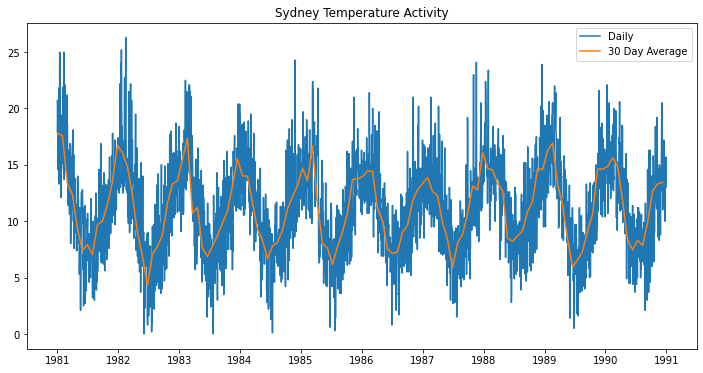

In [25]:
plt.figure(figsize=(12,6))
plt.plot(temp_df, label='Daily')
plt.plot(avg_temp_df, label='30 Day Average')
plt.legend()
plt.title('Sydney Temperature Activity')

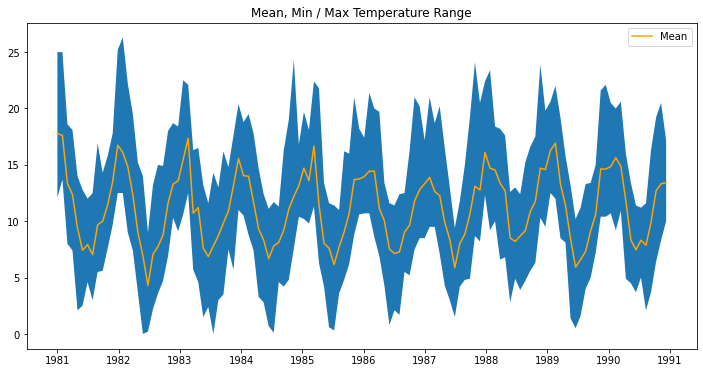

In [26]:
resample_temp_df = temp_df.resample(rule='30D').agg(['mean','min','max'])
plt.figure(figsize=(12,6))
plt.fill_between(resample_temp_df.index, resample_temp_df[('Temp','min')], resample_temp_df[('Temp','max')])
plt.plot(resample_temp_df[('Temp', 'mean')], color='orange', label='Mean')
plt.legend()
plt.title('Mean, Min / Max Temperature Range');

# Rolling
* Take an offsetting n number of points into a grouping
* Can apply arbitrary aggregates to the groupings
* By default there will be n-1 points that are not populated
* Can control the minimum number of points
* Appropriate when a subset of recent points are representative

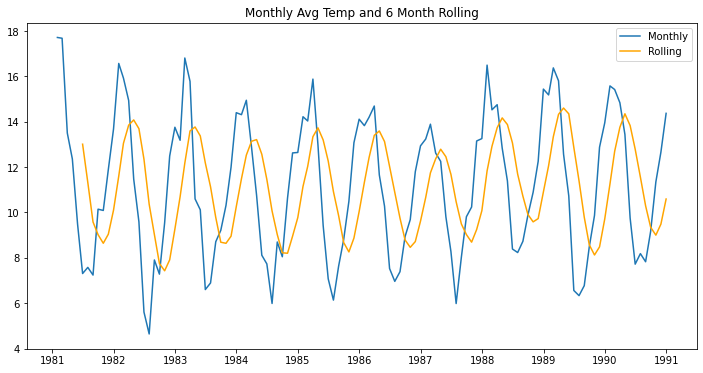

In [23]:
plt.figure(figsize=(12,6))
plot_temp_df = temp_df.resample(rule='M').mean()
plot_temp_df['Rolling'] = plot_temp_df.rolling(6).mean()
plt.plot(plot_temp_df.Temp, label='Monthly')
plt.plot(plot_temp_df.Rolling, color='orange', label='Rolling')
plt.legend()
plt.title('Monthly Avg Temp and 6 Month Rolling');

# Expanding
* Take in n points
* Compute the aggregate over the selection
* Add the next point, and recompute
* Appropriate when the entire data set would be good to use

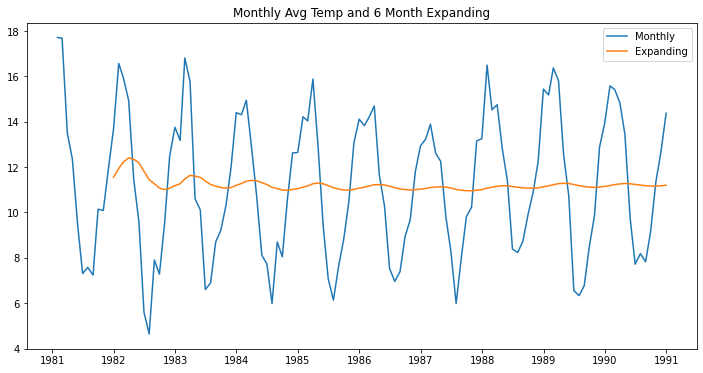

In [22]:
plot_temp_df = temp_df.resample(rule='M').mean()
plot_temp_df['Expanding'] = plot_temp_df['Temp'].expanding(12).mean()

plt.figure(figsize=(12,6))
plt.plot(plot_temp_df.Temp, label='Monthly')
plt.plot(plot_temp_df.Expanding, label='Expanding')
plt.legend()
plt.title('Monthly Avg Temp and 6 Month Expanding');